In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import math
from sklearn.cluster import AgglomerativeClustering

In [2]:
datapath_train=r"/home/hemanth/Desktop/neural/nndataset/train"
datapath_test=r"/home/hemanth/Desktop/neural/nndataset/test"
fruits=["apple","orange","banana"]

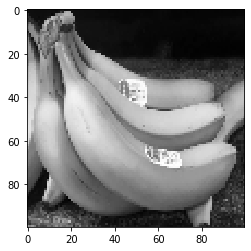

In [3]:
train=[]
test=[]
for types in fruits:
            path=os.path.join(datapath_train,types)
            class_num=fruits.index(types)
            for img in os.listdir(path):
                        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                        img_array=cv2.resize(img_array,(100,100))
                        train.append([img_array,class_num])
                        plt.imshow(img_array,cmap="gray")
                        #plt.show()
            path=os.path.join(datapath_test,types)
            class_num=fruits.index(types)
            for img in os.listdir(path):
                        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                        img_array=cv2.resize(img_array,(100,100))
                        test.append([img_array,class_num])
                        plt.imshow(img_array,cmap="gray")
                        #plt.show()



In [4]:
print(len(train))
print(len(test))

101
66


In [5]:
random.shuffle(train)

x_train=[]
y_train=[]

for i in train:
            x_train.append(np.array(i[0]).flatten())
            y_train.append(i[1])

            
x_test=[]
y_test=[]
for i in test:
            x_test.append(np.array(i[0]).flatten())
            y_test.append(i[1])                    
k=15

In [6]:
hc=AgglomerativeClustering(n_clusters=15,affinity="euclidean",linkage="ward")
hc.fit_predict(x_train)
print(len(hc.labels_))

101


In [7]:
cluster=[]
for i in range(k):
    cluster.append([])

In [8]:
j=0
for i in hc.labels_:
    cluster[i].append(x_train[j])
    j=j+1

In [9]:
hcentroids=[]
for j in range(len(cluster)):
    hcentroids.append(np.mean(cluster[j], axis=0))

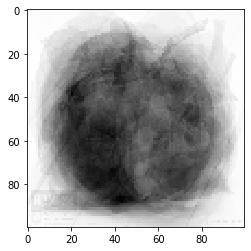

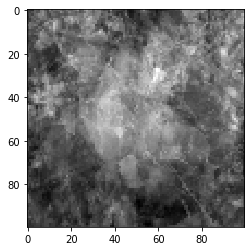

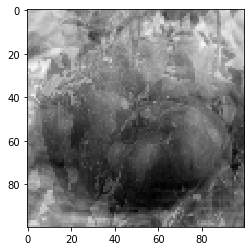

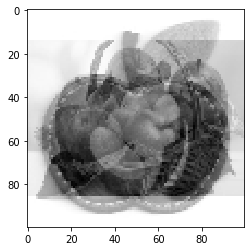

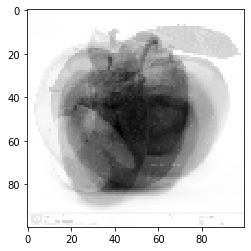

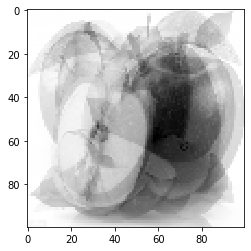

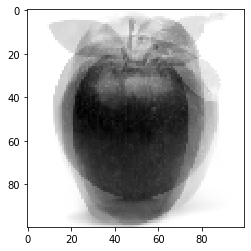

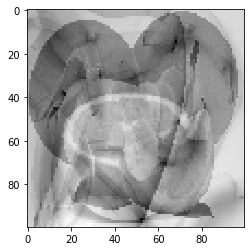

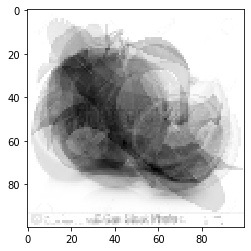

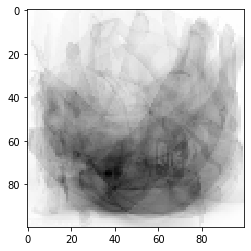

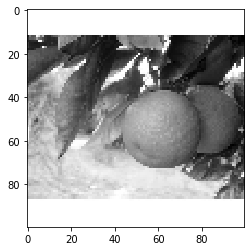

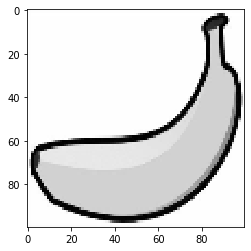

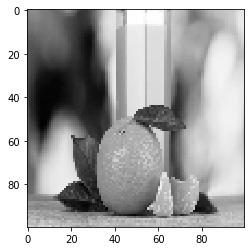

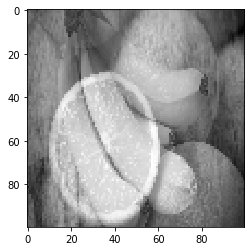

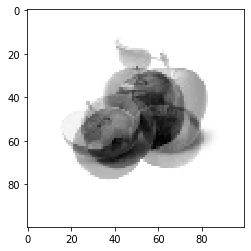

In [10]:
for i in range(len(hcentroids)):
    plt.imshow(hcentroids[i].reshape(100,100),cmap="gray")
    plt.show()

In [11]:
def convert_to_one_hot(y, num_of_classes):
        arr = np.zeros((len(y), num_of_classes))
        for i in range(len(y)):
            
            c =int( y[i] )
            arr[i][c] = 1
        return arr

    #calculate distance betweighteen data_set points and centroids
def get_distance(c,x):
        sum = 0
        for i in range(len(c)):
            sum += (c[i] - x[i]) ** 2
        return np.sqrt(sum)


    #calculating gaussian function
    
def rbf(x, c, s):
        d=(float)(get_distance(c,x))
        return np.exp(-(float)(d**2) / (2 * s**2))


    
def find_clusters(x_train,cluster_list):
    for x in x_train:  
                distances_list = []
                for c in centroids:
                    distances_list.append(get_distance(c, x))
                    #print("distance list ",distances_list)
                    #print('\n')
                cluster_list[int(np.argmin(distances_list))].append(x)

In [12]:
        #using k means
        x_train=np.array(x_train)
        #print(x_train)
        centroids=[]
        cluster_list=[]
        #Generate a uniform random sample from np.arange(len(x_train)) of size k without replacement:
        centroids = x_train[np.random.choice(range(len(x_train)), k, replace=False)]
        print((centroids))

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [ 49  41  36 ...   1   5  18]
 [172 172 173 ... 177 176 175]]


In [13]:
cluster_list = [[] for i in range(len(centroids))]
print(cluster_list) 
print('\n')

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]




In [14]:
        #for test purpose

        converged = False
        iterator = 0
        while (not converged) and (iterator < 100):
            cluster_list = [[] for i in range(len(centroids))]
            find_clusters(x_train,cluster_list)   
            cluster_list = list((filter(None, cluster_list)))
            prev_centroids = centroids.copy()
            centroids = []
            for j in range(len(cluster_list)):
                centroids.append(np.mean(cluster_list[j], axis=0))         
            pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))
            print('K-MEANS: ', int(pattern))
            converged = (pattern == 0)
            iterator += 1
        print('centroids',centroids)
       

/home/hemanth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


K-MEANS:  3084492
K-MEANS:  853207
K-MEANS:  100801
K-MEANS:  0
centroids [array([94. , 95.5, 90.5, ..., 96.5, 98. , 95.5]), array([241.22222222, 241.77777778, 242.        , ..., 246.        ,
       246.66666667, 245.66666667]), array([185., 185., 185., ..., 118., 133., 117.]), array([252. , 251.5, 252. , ..., 218. , 218. , 218. ]), array([248.92727273, 248.87272727, 248.83636364, ..., 250.81818182,
       250.49090909, 249.89090909]), array([ 83., 113.,  49., ..., 149.,  84.,  64.]), array([255., 255., 255., ..., 254., 254., 254.]), array([172., 166., 167., ...,  96.,  87.,  86.]), array([254. , 253.5, 254. , ..., 254.5, 254.5, 254.5]), array([255., 255., 255., ..., 255., 255., 255.]), array([94. , 81. , 76.5, ..., 78.5, 83. , 90. ]), array([254.875, 254.75 , 254.875, ..., 251.   , 251.125, 250.75 ]), array([255., 255., 255., ..., 255., 255., 255.]), array([49., 41., 36., ...,  1.,  5., 18.]), array([ 94.6,  89.4,  91.3, ..., 100.3,  91.7,  77.5])]


In [20]:
max=0
for i in range(0,len(centroids)):
            for j in range(0,len(centroids)):
                d=get_distance(centroids[i],centroids[j])
            if(d>max):
                 max=d
d=max
std_kmeans= d/math.sqrt(2*k) 
print(std_kmeans)

2245.7896640714134


In [22]:
max=0
for i in range(0,len(hcentroids)):
            for j in range(0,len(hcentroids)):
                d=get_distance(hcentroids[i],hcentroids[j])
            if(d>max):
                 max=d
d=max
std_h= d/math.sqrt(2*k) 
print(std_h)

2709.35929066856


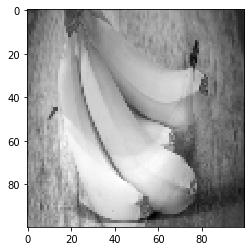

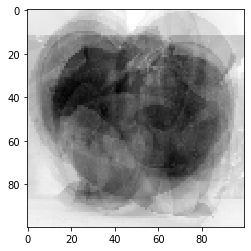

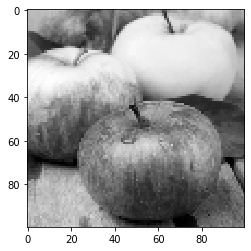

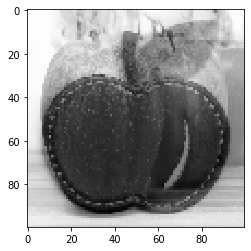

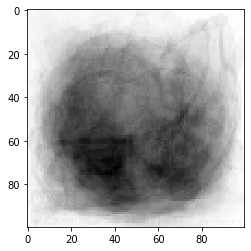

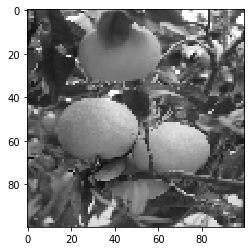

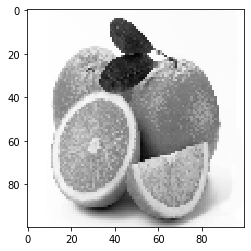

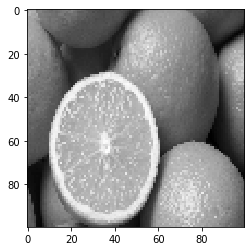

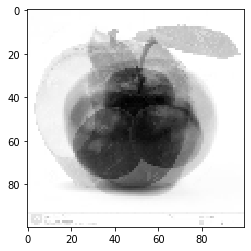

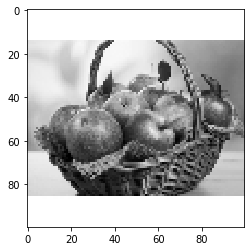

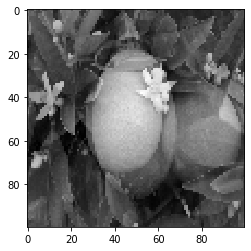

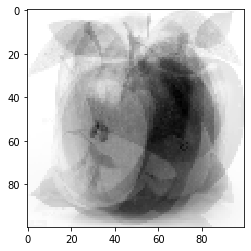

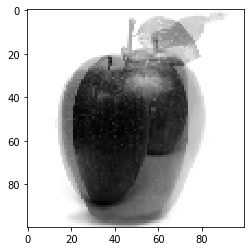

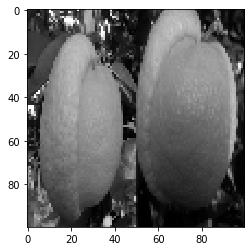

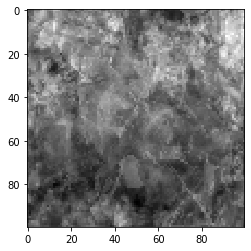

In [23]:
for i in range(len(centroids)):
    plt.imshow(centroids[i].reshape(100,100),cmap="gray")
    plt.show()


In [24]:
        weight=[]
        total_epochs=25
        learning_rate=0.01
        bias=[np.random.randn(3)]
        weight=np.array([np.random.rand(3) for j in range(len(centroids))])
        weight.reshape(3,k)   
        print(weight.shape)
        print(weight)
        print(bias)

(15, 3)
[[0.02541993 0.02501406 0.81954834]
 [0.13133455 0.66774457 0.38816523]
 [0.58306736 0.42685768 0.18235902]
 [0.11492379 0.74424027 0.2599778 ]
 [0.76511231 0.00120697 0.46963308]
 [0.68118409 0.17489633 0.74727702]
 [0.67626959 0.14517512 0.21796828]
 [0.75954326 0.06906231 0.22652603]
 [0.70325082 0.90974333 0.13933854]
 [0.56764851 0.83417882 0.02003552]
 [0.20251141 0.61587053 0.07201978]
 [0.29906305 0.23735164 0.27822083]
 [0.47634158 0.7133026  0.28568418]
 [0.65861437 0.49715447 0.20956504]
 [0.06845294 0.50062154 0.80200816]]
[array([-0.12939796,  0.20147601, -0.11879466])]


In [25]:
        weight_h=[]
        total_epochs=25
        learning_rate=0.01
        bias_h=[np.random.randn(3)]
        weight_h=np.array([np.random.rand(3) for j in range(len(centroids))])
        weight_h.reshape(3,k)   
        print(weight_h.shape)
        print(weight_h)
        print(bias_h)

(15, 3)
[[0.84209327 0.57148079 0.40831537]
 [0.66211732 0.61863534 0.28842577]
 [0.72342936 0.21106574 0.97161397]
 [0.14252012 0.20107631 0.63041622]
 [0.00216584 0.43784377 0.11084662]
 [0.84410356 0.7034304  0.98403083]
 [0.00310177 0.16020902 0.81307422]
 [0.69514452 0.86133423 0.27461113]
 [0.58143054 0.58716816 0.94573248]
 [0.10940159 0.441268   0.12050421]
 [0.55507413 0.61668045 0.92971618]
 [0.36004494 0.97521152 0.04552902]
 [0.12018305 0.87764777 0.09120525]
 [0.67802756 0.3188559  0.58038824]
 [0.0209408  0.56768995 0.10736724]]
[array([ 0.7314305 ,  0.19351562, -0.37344507])]


In [26]:
y_train=convert_to_one_hot(y_train, 3)

In [27]:
        loss1=[]
        for epoch in range(total_epochs):
            sum=0
            i=0
            for i in range(len(x_train)):
                a= np.array([rbf(x_train[i], c, std_kmeans) for c in (centroids)]).reshape(1,k)
                F = a.dot(weight)+bias 
                F.reshape(1,3)
                loss = np.sum((y_train[i] - F)** 2)
                sum+=loss/3
                error = np.array((y_train[i] - F)).reshape(1,3)
                weight = weight + learning_rate *(a.T).dot(error)
                bias = bias + learning_rate * error
            print("weight and bias after ", epoch+1)
            print(weight)
            print(bias)
            loss1.append(sum)
        print('Loss occured:',loss1)

weight and bias after  1
[[0.02526294 0.02314312 0.8251311 ]
 [0.13239021 0.67324171 0.38918866]
 [0.58856226 0.42029562 0.18107817]
 [0.11956653 0.74273426 0.25995487]
 [0.73649031 0.00184121 0.53288095]
 [0.6756113  0.18092664 0.7398065 ]
 [0.66565984 0.15274951 0.21704609]
 [0.75224641 0.07614797 0.22419567]
 [0.7094165  0.90731142 0.1405747 ]
 [0.57210312 0.82358518 0.0191978 ]
 [0.2017677  0.62045012 0.07064839]
 [0.30072182 0.24088268 0.28041297]
 [0.48530805 0.70929506 0.28425772]
 [0.6525403  0.50000021 0.20731171]
 [0.07113324 0.50400948 0.80019685]]
[[0.03056265 0.21317541 0.07851529]]
weight and bias after  2
[[0.02419954 0.02120806 0.82960594]
 [0.13024044 0.67846627 0.38587125]
 [0.59258287 0.41369653 0.17808196]
 [0.12357686 0.74118407 0.25916542]
 [0.69456993 0.00135498 0.57620782]
 [0.66852329 0.18677787 0.73050433]
 [0.65290478 0.16006059 0.21303006]
 [0.74394116 0.08308595 0.22060326]
 [0.71228763 0.9046219  0.13737753]
 [0.57562327 0.81303481 0.01733121]
 [0.20039048

weight and bias after  14
[[ 0.00251544 -0.00219713  0.87761431]
 [ 0.08865218  0.73836745  0.31833442]
 [ 0.62425422  0.33901839  0.13648922]
 [ 0.16526396  0.72247849  0.24609141]
 [ 0.18252105 -0.01048304  0.92114679]
 [ 0.5738494   0.25171313  0.61759869]
 [ 0.50016709  0.24080482  0.14733546]
 [ 0.6391216   0.16078803  0.17484022]
 [ 0.72922297  0.87110761  0.07099569]
 [ 0.60517458  0.69407425 -0.00750696]
 [ 0.17616278  0.67800094  0.04184078]
 [ 0.26892264  0.28095736  0.23015173]
 [ 0.56755728  0.6561402   0.23489214]
 [ 0.55077099  0.53267514  0.15547033]
 [ 0.07632531  0.54498967  0.75343482]]
[[0.20274923 0.21671888 0.14886659]]
weight and bias after  15
[[ 4.25777062e-04 -4.12932942e-03  8.81676830e-01]
 [ 8.54482516e-02  7.43256191e-01  3.12564327e-01]
 [ 6.26261943e-01  3.33203876e-01  1.33393045e-01]
 [ 1.68516821e-01  7.20933870e-01  2.45078001e-01]
 [ 1.45547745e-01 -1.14139011e-02  9.45281407e-01]
 [ 5.65957957e-01  2.56760681e-01  6.08990902e-01]
 [ 4.88530193e-01  

In [28]:
        #using hierarchical centroids
        loss2=[]
        epoch=0
        for epoch in range(total_epochs):
            sum=0
            i=0
            for i in range(len(x_train)):
                a= np.array([rbf(x_train[i], c, std_h) for c in (hcentroids)]).reshape(1,k)
                F = a.dot(weight_h)+bias_h
                F.reshape(1,3)
                loss = np.sum((y_train[i] - F)** 2)
                sum+=loss/3
                error = np.array((y_train[i] - F)).reshape(1,3)
                weight_h = weight_h + learning_rate *(a.T).dot(error)
                bias_h = bias_h + learning_rate * error
            print("weight and bias after ", epoch+1)
            print(weight_h)
            print(bias_h)
            loss2.append(sum)
        print('Loss occured:',loss2)

weight and bias after  1
[[ 0.6888851   0.49836591  0.41261778]
 [ 0.64963062  0.63298405  0.29358778]
 [ 0.7216992   0.21049598  0.9731876 ]
 [ 0.1265379   0.19236965  0.62606396]
 [-0.03600493  0.41107275  0.09962862]
 [ 0.79910066  0.67816123  0.98500991]
 [-0.00540152  0.15013602  0.80410446]
 [ 0.60286849  0.81005753  0.29973898]
 [ 0.43799032  0.51043403  0.9577847 ]
 [-0.0798703   0.31449713  0.18722965]
 [ 0.54401122  0.61970151  0.92332945]
 [ 0.34247365  0.95777807  0.0615466 ]
 [ 0.10948532  0.87586839  0.09368324]
 [ 0.66767457  0.32080788  0.58747487]
 [-0.04078402  0.51685097  0.11820112]]
[[ 0.2218819  -0.06152705 -0.23359095]]
weight and bias after  2
[[ 0.61094261  0.46483072  0.39889071]
 [ 0.64441914  0.65070473  0.29659944]
 [ 0.72637672  0.21303409  0.97295233]
 [ 0.12397651  0.1905528   0.61848196]
 [-0.04448846  0.39975685  0.08149313]
 [ 0.78115994  0.66698856  0.97938471]
 [ 0.00180384  0.14809788  0.79141969]
 [ 0.55259029  0.78082118  0.31443494]
 [ 0.3649929

weight and bias after  14
[[ 0.22639655  0.3835338   0.16144933]
 [ 0.57381344  0.83619365  0.31659359]
 [ 0.78453332  0.23331427  0.95874977]
 [ 0.16055721  0.20088552  0.52291385]
 [ 0.0219979   0.35799768 -0.13692853]
 [ 0.73277222  0.62566495  0.88667034]
 [ 0.14313979  0.1486156   0.64517393]
 [ 0.25599463  0.60688215  0.42471134]
 [ 0.02874925  0.32324563  0.8108541 ]
 [-0.63032568 -0.23712754  0.57918878]
 [ 0.45312957  0.67332959  0.82801395]
 [ 0.25116089  0.81125392  0.21688127]
 [ 0.06518368  0.89250386  0.09518576]
 [ 0.5904515   0.36486022  0.65363468]
 [-0.06174806  0.30224057  0.08614791]]
[[ 0.25228032  0.00907211 -0.14408847]]
weight and bias after  15
[[ 0.20556285  0.38440111  0.14331208]
 [ 0.56527309  0.8487961   0.31777481]
 [ 0.78753156  0.23338694  0.95734712]
 [ 0.1636125   0.20155976  0.51588988]
 [ 0.02861198  0.35549009 -0.15235916]
 [ 0.73077269  0.62362145  0.87962103]
 [ 0.15325316  0.14767461  0.63494462]
 [ 0.23773261  0.59668044  0.43287438]
 [ 0.01268

In [29]:
        c=0
        y_pred = []
        for i in range(len(x_test)):
                a = np.array([rbf(x_test[i], c, std) for c in centroids]).reshape(1,k)  
                F = a.dot(weight)+ bias
                y_pred.append(F)
       

        y_pred= np.array([np.argmax(x) for x in y_pred])
        print('prediction:',y_pred)
        y_test=np.array(y_test)
        print(y_test)
        diff = y_pred - y_test
        print(diff)
        c=0
        for i in range(len(diff)):
            if diff[i]==0:
                c=c+1
        print('Accuracy from kmeans clustering: ', c/ len(diff))


prediction: [1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 2 0 1 2 1 1 2 1 2 1 2 0
 1 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 0 2 0 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[ 1  0  1  1  0  0  1  0  1  1  1  1  0  0  1  0  1  1  1  1  1  1  0 -1
  0  1 -1  0  1  0  0  1  0  1  0  1 -1  0  0  0  0  0  0  1  0  0  0  0
  0  0 -2  0  0  0 -2  0  0 -2  0  0  0 -2  0 -2  0 -2]
Accuracy from kmeans clustering:  0.5454545454545454


In [30]:
        c=0
        y_pred = []
        for i in range(len(x_test)):
                a = np.array([rbf(x_test[i], c, std) for c in hcentroids]).reshape(1,k)  
                F = a.dot(weight_h)+ bias_h
                y_pred.append(F)
       

        y_pred= np.array([np.argmax(x) for x in y_pred])
        print('prediction:',y_pred)
        y_test=np.array(y_test)
        print(y_test)
        diff = y_pred - y_test
        print(diff)
        c=0
        for i in range(len(diff)):
            if diff[i]==0:
                c=c+1
        print('Accuracy from hierachical clustering: ', c/ len(diff))

prediction: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 2 0 2 0 2 0
 0 0 0 1 1 1 2 0 2 1 2 2 2 0 2 2 2 0 0 2 0 2 2 2 0 2 0 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0 -1 -1
 -1  0 -1 -1 -1  0  0  1 -1  1 -1  1 -1 -1 -1 -1  0  0  0  1 -2  0 -1  0
  0  0 -2  0  0  0 -2 -2  0 -2  0  0  0 -2  0 -2  0 -2]
Accuracy from hierachical clustering:  0.6060606060606061
